Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
census = pd.read_csv('https://raw.githubusercontent.com/VPDeb/DS-Unit-2-Applied-Modeling/master/Build%20Week%20Project/census.csv')

In [64]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [65]:
#cenusus2 = pd.read_csv('https://raw.githubusercontent.com/VPDeb/DS-Unit-2-Applied-Modeling/master/Build%20Week%20Project/census.csv')

In [66]:
#census2

In [67]:
census.isin(['?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [68]:
census.replace({'?': np.NaN}, inplace=True)

In [69]:
census.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [70]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
census.astype(object).nunique()

age                  74
workclass             8
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [85]:
census.replace({'?': 'NaN'}, inplace=True)

In [87]:
census.dropna(inplace=True)

In [88]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [89]:
def over50K(census):
    if census['income'] == '>50K':
        val = 1
    else:
        val = 0
    return val
census['makes-50K+'] = census.apply(over50K, axis=1)
  
    
    #X.fillna(census.mean())


In [90]:
def over40(census):
    if census['hours-per-week'] >=40:
        val = 1
    else:
        val = 0
    return val
census['over40hrs+'] = census.apply(over40, axis=1)

In [91]:
def gender(census):
    if census['sex'] == 'Female':
            val = 1
    else:
            val = 0
    return val
census['gender-F/1-M/0'] = census.apply(gender, axis=1)

In [92]:
census

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,makes-50K+,over40hrs+,gender-F/1-M/0
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,1,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0,1
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1,1
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0,0


In [93]:
#cols = 'fnlwgt','income','hours-per-week','sex'
census = census.drop(columns=['fnlwgt','income','hours-per-week','sex'])

In [94]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  native-country  45222 non-null  object
 11  makes-50K+      45222 non-null  int64 
 12  over40hrs+      45222 non-null  int64 
 13  gender-F/1-M/0  45222 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.2+ MB


In [95]:
census

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,native-country,makes-50K+,over40hrs+,gender-F/1-M/0
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,United-States,0,1,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,United-States,0,1,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,United-States,1,1,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,United-States,1,1,0
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,United-States,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,United-States,0,0,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,United-States,1,1,0
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,United-States,0,1,1
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,United-States,0,0,0


In [96]:
target = 'gender-F/1-M/0'
y = census[target]
X = census.drop(target,axis=1)

In [97]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,native-country,makes-50K+,over40hrs+
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,United-States,0,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,United-States,0,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,United-States,1,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,United-States,1,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,0,0,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,United-States,0,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,United-States,1,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,United-States,0,1
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,United-States,0,0


In [98]:
y

0        0
1        0
2        0
3        0
5        0
        ..
48837    1
48838    0
48839    1
48840    0
48841    1
Name: gender-F/1-M/0, Length: 45222, dtype: int64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [109]:
y_train.value_counts()

0    24405
1    11772
Name: gender-F/1-M/0, dtype: int64

In [110]:
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.6745998839041379


In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt

In [112]:
model_bag = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier()
)
model_bag.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'education',
                                      'marital-status', 'occupation',
                                      'relationship', 'race',
                                      'native-country'],
                                mapping=[{'col': 'workclass',
                                          'data_type': dtype('O'),
                                          'mapping': Self-emp-inc        1
Private             2
Self-emp-not-inc    3
State-gov           4
Local-gov           5
Federal-gov         6
Without-pay         7
NaN                -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'...
Columbia                      16
China                         17
Iran                          18
El-Salvador                   19
Greece                        20
Ecuador                       21
Italy      

In [114]:
model_boost = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier()
)
model_boost.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['workclass', 'education',
                                      'marital-status', 'occupation',
                                      'relationship', 'race',
                                      'native-country'],
                                mapping=[{'col': 'workclass',
                                          'data_type': dtype('O'),
                                          'mapping': Self-emp-inc        1
Private             2
Self-emp-not-inc    3
State-gov           4
Local-gov           5
Federal-gov         6
Without-pay         7
NaN                -2
dtype: int64},
                                         {'col': 'education',
                                          'data_type': dtype('O'...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                        

In [115]:
print('Training accuracy:', model_bag.score(X_train, y_train))
print('Validation accuracy:', model_bag.score(X_test, y_test))

Training accuracy: 0.9592558808082483
Validation accuracy: 0.8339414040906579


In [118]:
print('Training accuracy:', model_boost.score(X_train, y_train))
print('Validation accuracy:', model_boost.score(X_test, y_test))

Training accuracy: 0.8896812892169058
Validation accuracy: 0.8514096185737977


In [122]:
perm_imp = permutation_importance(model_boost, X_test, y_test, n_jobs=10, random_state=42)

data = {'importances_mean' : perm_imp['importances_mean'],
        'importances_std' : perm_imp['importances_std']}

permutation_importances = pd.DataFrame(data, index=X_test.columns)
permutation_importances.sort_values('importances_mean', ascending=True, inplace=True)
permutation_importances

,importances_mean,importances_std
capital-loss,2.220446e-17,0.000280
education,7.517966e-04,0.001059
race,1.238253e-03,0.001284
native-country,2.034273e-03,0.000814
capital-gain,2.343836e-03,0.000486
education-num,2.476506e-03,0.001024
workclass,5.704809e-03,0.001337
over40hrs+,5.925926e-03,0.001275
age,6.279713e-03,0.002800
makes-50K+,7.562189e-03,0.001792


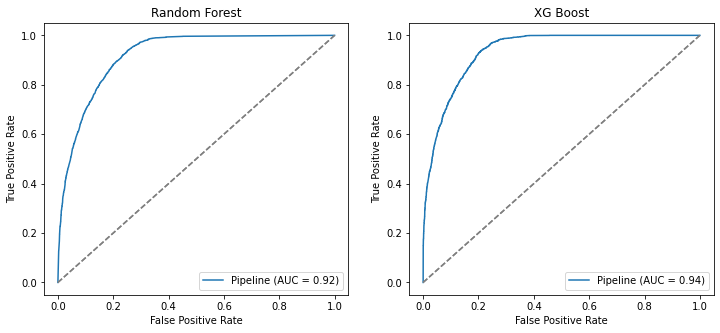

In [128]:

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

plot_roc_curve(model_bag, X_test, y_test, ax=ax1)
plot_roc_curve(model_boost, X_test, y_test, ax=ax2)
ax1.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax2.plot([(0,0), (1,1)], color='grey', linestyle='--')
ax1.set_title('Random Forest')
ax2.set_title('XG Boost')

plt.show()